In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit

%matplotlib inline
sns.set(rc={'figure.figsize':(15,12)})

In [2]:
df = pd.read_csv('train.csv')
df.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [3]:
df.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [4]:
df["category"] = df[['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']].idxmax(axis=1)
df.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance          category  
0                     0  Computer Science  
1                     0  Computer Science  
2                     0       Mathematics  
3                     0       Mathematics  
4                     0  Computer Science

In [5]:
df.drop(['Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'], axis=1, inplace=True)
df.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT          category  
0    Predictive models allow subject-specific inf...  Computer Science  
1    Rotation invariance and translation invarian...  Computer Science  
2    We introduce and develop the notion of spher...       Mathematics  
3    The stochastic Landau--Lifshitz--Gilbert (LL...       Mathematics  
4    Fourier-transform infra-red (FTIR) spectra o...  Computer Science

In [6]:
df.drop(['ID'], axis=1, inplace=True)
df.head()

TITLE  \
0        Reconstructing Subject-Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics and Poisson kernels fo...   
3  A finite element approximation for the stochas...   
4  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT          category  
0    Predictive models allow subject-specific inf...  Computer Science  
1    Rotation invariance and translation invarian...  Computer Science  
2    We introduce and develop the notion of spher...       Mathematics  
3    The stochastic Landau--Lifshitz--Gilbert (LL...       Mathematics  
4    Fourier-transform infra-red (FTIR) spectra o...  Computer Science

In [7]:
validation_df = pd.read_csv('test.csv')
validation_df.head()

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   
2  20975         Case For Static AMSDU Aggregation in WLANs   
3  20976  The $Gaia$-ESO Survey: the inner disk intermed...   
4  20977  Witness-Functions versus Interpretation-Functi...   

                                            ABSTRACT  
0    We present novel understandings of the Gamma...  
1    Meteorites contain minerals from Solar Syste...  
2    Frame aggregation is a mechanism by which mu...  
3    Milky Way open clusters are very diverse in ...  
4    Proving that a cryptographic protocol is cor...

In [8]:
df.shape

(20972, 3)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
sns.set(rc={'figure.figsize':(15,12)})

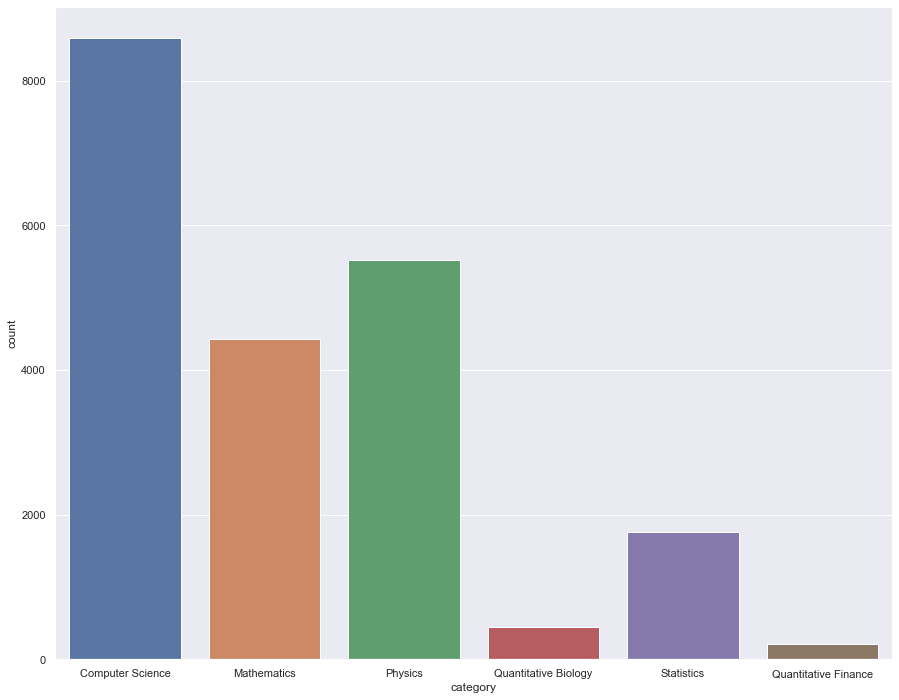

In [10]:
sns.countplot(x ='category', data = df)

In [11]:
df['TITLE'] = df['TITLE'].str.replace("\n", " ")
df['TITLE'] = df['TITLE'].str.replace("\r", " ")
df['TITLE'] = df['TITLE'].str.replace("\t", " ")
df['TITLE'] = df['TITLE'].str.replace("\\", "")
df['TITLE'] = df['TITLE'].str.replace('"', '')
df['TITLE'] = df['TITLE'].str.replace('   ', '')
df['TITLE'] = df['TITLE'].str.lower()
df['TITLE'] = df['TITLE'].str.replace("'s", "")

df['ABSTRACT'] = df['ABSTRACT'].str.replace("\n", " ")
df['ABSTRACT'] = df['ABSTRACT'].str.replace("\r", " ")
df['ABSTRACT'] = df['ABSTRACT'].str.replace("\t", " ")
df['ABSTRACT'] = df['ABSTRACT'].str.replace("\\", "")
df['ABSTRACT'] = df['ABSTRACT'].str.replace('"', '')
df['ABSTRACT'] = df['ABSTRACT'].str.lower()
df['ABSTRACT'] = df['ABSTRACT'].str.replace('   ', '')
df['ABSTRACT'] = df['ABSTRACT'].str.replace("'s", "")

punctuation_signs = list("?:!.,;-{}()[]\\\'$´-_=ζ£#@/`^*+")
df['TITLE'] = df['TITLE']
for punct_sign in punctuation_signs:
    df['TITLE'] = df['TITLE'].str.replace(punct_sign, '')
    df['ABSTRACT'] = df['ABSTRACT'].str.replace(punct_sign, '')

In [12]:
wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['TITLE'] + " " + df.loc[row]['ABSTRACT']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)
    
df['Content_lemmitized'] = lemmatized_text_list

In [13]:
#nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

df['Words'] = df['Content_lemmitized']

for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['Words'] = df['Words'].str.replace(regex_stopword, '')

#print(len(df.loc[5]['Words']), len(df.loc[5]['Content_lemmitized']))

print(np.unique(df['category']))

['Computer Science' 'Mathematics' 'Physics' 'Quantitative Biology'
 'Quantitative Finance' 'Statistics']


In [14]:
relValue = {
    'Computer Science':0,
    'Mathematics':1,
    'Physics':2,
    'Quantitative Biology':3,
    'Quantitative Finance':4,
    'Statistics':5
}

df["category"] = df['category'].map(relValue).astype(int)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['Words'], 
          df['category'], test_size=0.2, random_state=42, stratify=df['category'])

In [16]:
# TFIDF
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.0
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

In [17]:
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(16777, 300)
(4195, 300)


In [18]:
print(features_train.shape)
print(features_test.shape)

(16777, 300)
(4195, 300)


In [19]:
from sklearn.naive_bayes import MultinomialNB
mnbc = MultinomialNB()
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
mnbc.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.7385110568039578


In [22]:
mnbc_pred = mnbc.predict(features_test)

In [23]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.7382598331346841


In [24]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.68      0.91      0.77      1719
           1       0.77      0.73      0.75       887
           2       0.85      0.80      0.82      1104
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00        42
           5       1.00      0.01      0.02       353

    accuracy                           0.74      4195
   macro avg       0.55      0.41      0.39      4195
weighted avg       0.75      0.74      0.69      4195



In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr_0 = LogisticRegression(random_state = 8)

print('Parameters currently in use:\n')
pprint(lr_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [27]:
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [28]:
# First create the base model to tune
lrc = LogisticRegression(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 10.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight': ['balanc

In [29]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': None, 'C': 1.0}

The mean accuracy of a model with these hyperparameters is:
0.7595516412512712


In [30]:
# Create the parameter grid based on the results of random search 
C = [float(x) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['sag']
class_weight = ['balanced']
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# Create a base model
lrc = LogisticRegression(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lrc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=...
             param_grid={'C': [0.6, 0.6444444444444444, 0.6888888888888889,
                               0.7333333333333333, 0.7777777777777778,
                               0.8222222222222222, 0.8666666666666667,
                               0.9111111111111111, 0.9555555555555555, 1.0]

In [31]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.6888888888888889, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.6014689061465294


In [32]:
best_lrc = grid_search.best_estimator_
best_lrc

LogisticRegression(C=0.6888888888888889, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [33]:
best_lrc.fit(features_train, labels_train)

LogisticRegression(C=0.6888888888888889, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [34]:
lrc_pred = best_lrc.predict(features_test)

In [35]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_lrc.predict(features_train)))

The training accuracy is: 
0.24736246051141444


In [36]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, lrc_pred))

The test accuracy is: 
0.23480333730631706


In [37]:
# Classification report
print("Classification report")
print(classification_report(labels_test,lrc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.62      0.26      0.36      1719
           1       0.87      0.25      0.39       887
           2       0.99      0.06      0.12      1104
           3       0.25      0.11      0.15        90
           4       0.02      0.81      0.04        42
           5       0.16      0.59      0.25       353

    accuracy                           0.23      4195
   macro avg       0.48      0.35      0.22      4195
weighted avg       0.72      0.23      0.29      4195



In [38]:
from sklearn import svm

In [39]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [40]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [41]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

In [ ]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

In [ ]:
best_svc = grid_search.best_estimator_
best_svc

In [ ]:
best_svc.fit(features_train, labels_train)

In [ ]:
svc_pred = best_svc.predict(features_test)

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_svc.predict(features_train)))

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svc_pred))

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,svc_pred))

In [ ]:
#gb_0 = GradientBoostingClassifier(random_state = 8)

In [ ]:
# # n_estimators
# n_estimators = [200, 800]

# # max_features
# max_features = ['auto', 'sqrt']

# # max_depth
# max_depth = [10, 40]
# max_depth.append(None)

# # min_samples_split
# min_samples_split = [10, 30, 50]

# # min_samples_leaf
# min_samples_leaf = [1, 2, 4]

# # learning rate
# learning_rate = [.1, .5]

# # subsample
# subsample = [.5, 1.]

In [ ]:
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'learning_rate': learning_rate,
#                'subsample': subsample}

# pprint(random_grid)

In [ ]:
# # First create the base model to tune
# gbc = GradientBoostingClassifier(random_state=8)

In [ ]:
# # Definition of the random search
# random_search = RandomizedSearchCV(estimator=gbc,
#                                    param_distributions=random_grid,
#                                    n_iter=50,
#                                    scoring='accuracy',
#                                    cv=3, 
#                                    verbose=1, 
#                                    random_state=8)
# # Fit the random search model
# random_search.fit(features_train, labels_train)

In [ ]:
# print("The best hyperparameters from Random Search are:")
# print(random_search.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(random_search.best_score_)